# 🤗 Hugging Face Pipelines Tutorial

Welcome to this Jupyter Notebook on **Hugging Face Pipelines**! In this notebook, we'll explore how to leverage the `transformers` library from Hugging Face to easily access state-of-the-art models for a wide range of Natural Language Processing (NLP) tasks.

## 📌 What You'll Learn

- Introduction to Hugging Face `pipeline` abstraction
- How to use pipelines for various NLP tasks like:
  - Sentiment Analysis
  - Text Generation
  - Named Entity Recognition (NER)
  - Question Answering
  - Translation and more
- Tips on optimizing pipeline performance
- Using custom models from the Hugging Face Hub

## 🔧 Prerequisites

Before diving in, ensure you have the following installed:

```bash
pip install transformers


In [1]:
import torch
from google.colab import userdata
from huggingface_hub import login
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [2]:
hf_token = userdata.get('HF_TOKEN')

In [3]:
login(hf_token, add_to_git_credential=True)

In [5]:
#sentiment analysis
classifier = pipeline('sentiment-analysis',device = 'cuda')
result = classifier('It was n awesome experience')
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9996689558029175}]


In [7]:
#named entity recognition
ner = pipeline('ner',grouped_entities = True,device = 'cuda')
result = ner('Abhishek is from India')
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda


[{'entity_group': 'PER', 'score': np.float32(0.9839119), 'word': 'Abhishek', 'start': 0, 'end': 8}, {'entity_group': 'LOC', 'score': np.float32(0.99955827), 'word': 'India', 'start': 17, 'end': 22}]


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [12]:
#question answering
question_answering = pipeline('question-answering',device = 'cuda')
print(question_answering(question = 'Who is the Prime Minister of India?',context="Modi is the current Prime Minister of India"))

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'score': 0.999043881893158, 'start': 0, 'end': 4, 'answer': 'Modi'}


In [15]:
#text summarization
summarizer = pipeline('summarization',device = 'cuda')
text = """
Game of Thrones is an American fantasy drama television series created by David Benioff and D. B. Weiss for HBO. It is an adaptation of A Song of Ice and Fire, a series of high fantasy novels by George R. R. Martin, the first of which is A Game of Thrones. The show premiered on HBO in the United States on April 17, 2011, and concluded on May 19, 2019, with 73 episodes broadcast over eight seasons.

Set on the fictional continents of Westeros and Essos, Game of Thrones has a large ensemble cast and follows several story arcs throughout the course of the show. The first major arc concerns the Iron Throne of the Seven Kingdoms of Westeros through a web of political conflicts among the noble families either vying to claim the throne or fighting for independence from whoever sits on it. The second major arc focuses on the last descendant of the realm's deposed ruling dynasty, who has been exiled to Essos and is plotting to return and reclaim the throne. The third follows the Night's Watch, a military order defending the realm against threats from beyond the Seven Kingdoms' northern border.

Game of Thrones attracted a record viewership on HBO and has a broad, active, and international fan base. Many critics and publications have named the show one of the greatest television series of all time. Critics have praised the series for its acting, complex characters, story, scope, and production values, although its frequent use of nudity and violence (including sexual violence) generated controversy. The final season received significant criticism for its reduced length and creative decisions, with many considering it a disappointing conclusion. The series received 59 Primetime Emmy Awards, the most by a drama series, including Outstanding Drama Series in 2015, 2016, 2018 and 2019. Its other awards and nominations include three Hugo Awards for Best Dramatic Presentation, a Peabody Award, and five nominations for the Golden Globe Award for Best Television Series – Drama.

A prequel series, House of the Dragon, premiered on HBO in 2022. A second prequel currently in production, A Knight of the Seven Kingdoms, is scheduled to debut in 2025.
"""

print(summarizer(text,max_length = 50, min_length = 25, do_sample = False)[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


 Game of Thrones is an adaptation of A Song of Ice and Fire, a series of high fantasy novels by George R. R. Martin . The show premiered on HBO in the United States on April 17, 2011, and concluded on May


In [16]:
#translation
translator = pipeline('translation_en_to_fr',device = 'cuda')
result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda


Les Data Scientists ont été vraiment étonnés par la puissance et la simplicité de l'API du pipeline HuggingFace.


In [17]:
# Another translation, showing a model being specified
# All translation models are here: https://huggingface.co/models?pipeline_tag=translation&sort=trending

translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es", device="cuda")
result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")
print(result[0]['translation_text'])

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda


Los científicos de datos estaban verdaderamente sorprendidos por el poder y la simplicidad de la API de tuberías HuggingFace.


In [18]:
#Classification
classifier = pipeline('zero-shot-classification',device = 'cuda')
result = classifier("Hugging Face's Transformers library is amazing!", candidate_labels=["technology", "sports", "politics"])
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda


{'sequence': "Hugging Face's Transformers library is amazing!", 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9493839740753174, 0.03225007280707359, 0.018365919589996338]}


In [21]:
#text generation
generator = pipeline('text-generation',device = 'cuda')
result = generator("If there's one thing I want you to remember about using HuggingFace pipelines, it's")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there's one thing I want you to remember about using HuggingFace pipelines, it's that it will always handle the data differently. HuggingFace takes the form of a simple, simple-looking API for generating and consuming data. That API


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

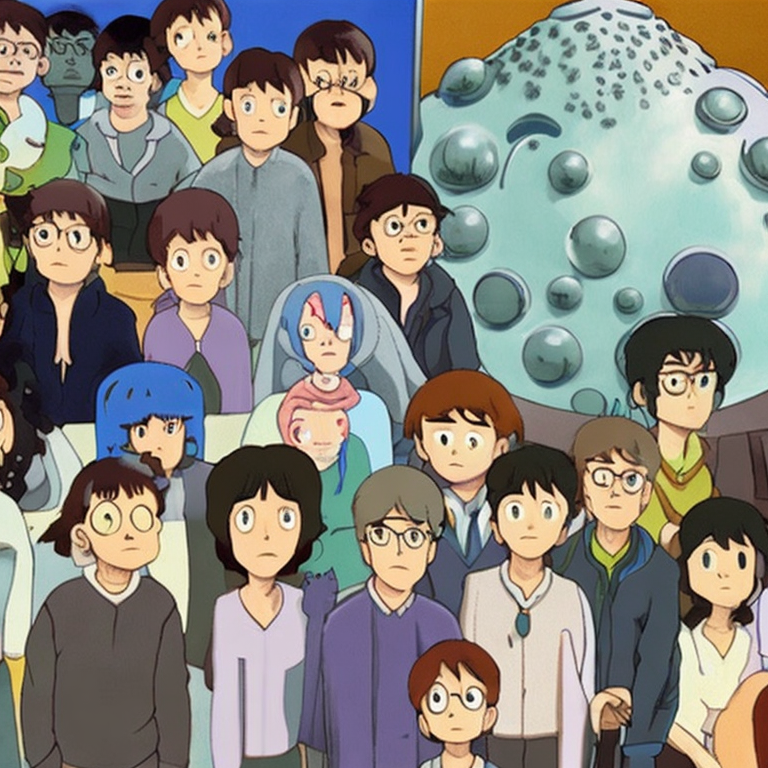

In [24]:
#Image Generation
image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype = torch.float16,
    use_safetensors = True,
    variant = 'fp16'
 ).to('cuda')

text = "A class of Data Scientists learning about AI, in the surreal style of Studio Ghibli"

image = image_gen(prompt = text).images[0]
image

In [6]:
# Audio Generation

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device='cuda')

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

speech = synthesiser("Hi to an artificial intelligence engineer, on the way to mastery!", forward_params={"speaker_embeddings": speaker_embedding})

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])
Audio("speech.wav")

Device set to use cuda
